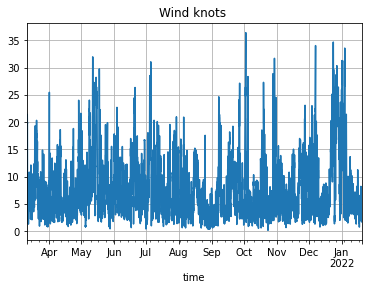

In [34]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_stations/ria_enm_windplus.csv",
                      usecols=["time","spd_udr"],parse_dates=["time"],index_col="time")

#resample mean  gust hour before km/h a m/s
station = station.resample("H",label="right",closed="right").mean()*0.277778

#label
labels = ["F0","F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12"]
interval = pd.IntervalIndex.from_tuples([(-1, 0.5), (.5, 1.5), (1.5, 3.3),(3.3,5.5),
                                     (5.5,8),(8,10.7),(10.7,13.8),(13.8,17.1),
                                     (17.1,20.7),(20.7,24.4),(24.4,28.4),(28.4,32.6),(32.6,60)])
station["spd_udr_l"] = pd.cut(station.spd_udr, bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#Show knots
(station.spd_udr*1.94384).plot(title="Wind knots ", grid=True);

**Meteorological model points**

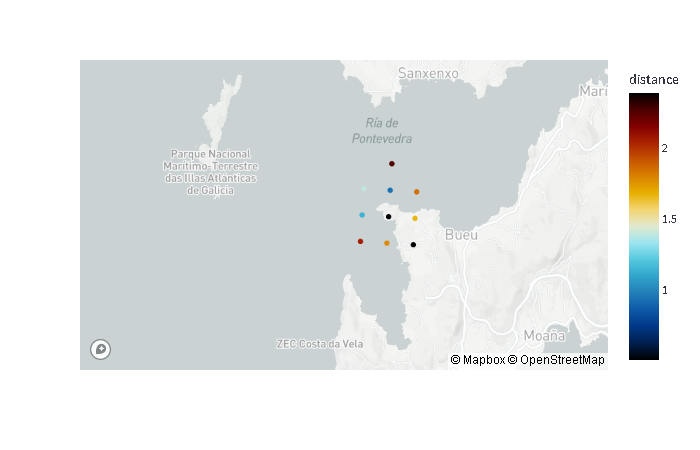

In [61]:
#Udra forecast and concat with station
met_model0 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/lat42.3394lon-8.8339p10R1KmD0.csv",
                         parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
df_all = pd.concat([station,met_model0],axis=1).dropna()
df_all = df_all.drop(columns=["spd_udr"])
df_all

,spd_udr_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2021-03-11 01:00:00,F5,186.27,0.00,1896.03,6.77,9.00,102346.87,286.41,0.95,24232.85,...,11.69,-6.95,0.59,0.40,0.00,0.59,5701.13,1534.72,259.19,278.50
2021-03-11 02:00:00,F4,193.73,0.00,1874.09,8.32,10.70,102329.05,286.43,0.95,24230.58,...,20.55,-7.24,0.61,0.50,0.00,0.61,5695.27,1532.56,258.94,278.30
2021-03-11 03:00:00,F4,192.96,0.00,1800.53,7.98,9.97,102276.86,286.43,0.96,24228.48,...,35.08,-5.08,0.40,0.69,0.00,0.69,5684.01,1527.39,258.86,277.62
2021-03-11 04:00:00,F5,204.99,0.00,1785.37,7.18,10.24,102299.73,286.52,0.95,24228.63,...,40.75,0.00,0.20,0.50,0.00,0.50,5677.55,1527.90,258.95,277.39
2021-03-11 05:00:00,F5,207.67,0.00,1832.71,7.59,10.24,102316.38,286.62,0.94,24227.37,...,49.94,-1.82,0.30,0.50,0.00,0.50,5671.85,1527.52,258.85,277.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19 19:00:00,F1,34.58,0.00,1806.42,2.09,2.89,103191.41,284.84,0.76,24135.00,...,0.00,0.00,0.00,0.00,0.00,0.00,5703.04,1606.34,252.13,279.32
2022-01-19 20:00:00,F2,29.39,0.00,1789.40,2.27,3.25,103125.89,284.55,0.76,24135.00,...,0.00,0.00,0.00,0.00,0.00,0.00,5703.35,1606.32,251.90,279.38
2022-01-19 21:00:00,F2,16.12,0.00,1800.98,3.84,4.72,103253.63,284.82,0.68,24135.00,...,0.00,0.00,0.00,0.00,0.00,0.00,5709.44,1613.70,251.72,279.54


In [27]:
#label meteorological model variables dir0 and dir1
df_all["mod0_l"] = pd.cut(df_all["mod0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all["mod9_l"] = pd.cut(df_all["mod9"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all[["spd_udr_l","mod0_l","mod9_l"]]

,spd_udr_l,mod0_l,mod9_l
time,,,
2021-03-11 01:00:00,F5,F4,F4
2021-03-11 02:00:00,F4,F5,F5
2021-03-11 03:00:00,F4,F4,F5
2021-03-11 04:00:00,F5,F4,F4
2021-03-11 05:00:00,F5,F4,F4
...,...,...,...
2022-01-19 19:00:00,F1,F2,F2
2022-01-19 20:00:00,F2,F2,F2
2022-01-19 21:00:00,F2,F3,F2


**meteorological model score point 0**

In [62]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Marin/meteorological_models/distan_lat42.3394lon-8.8339p10R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


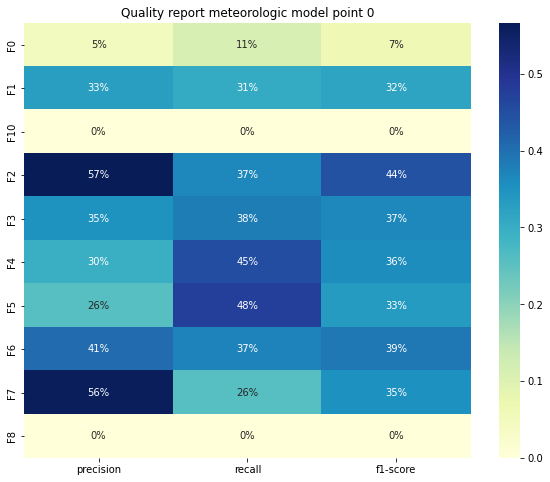

In [22]:
#meteorological model score point 0
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all.spd_udr_l, df_all.mod0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

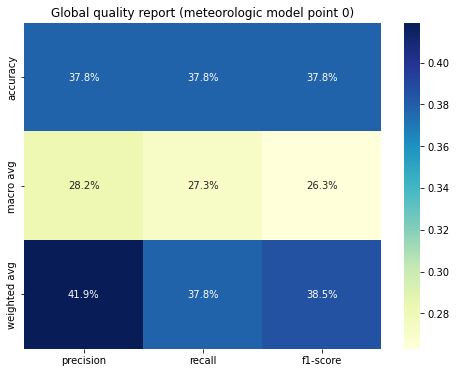

In [23]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

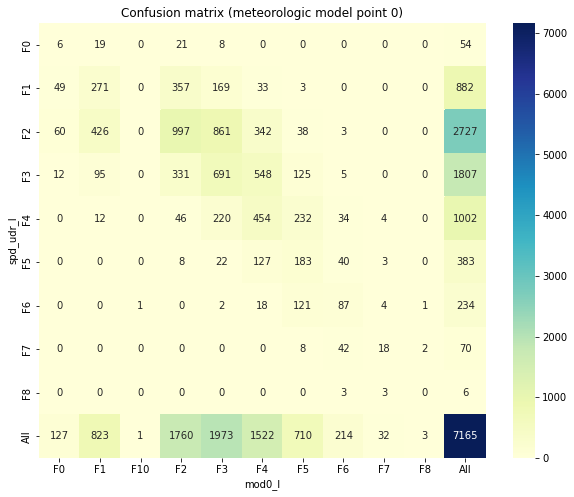

In [11]:
plt.figure(figsize=(10, 8))
plt.title("Confusion matrix (meteorologic model point 0)")

global_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

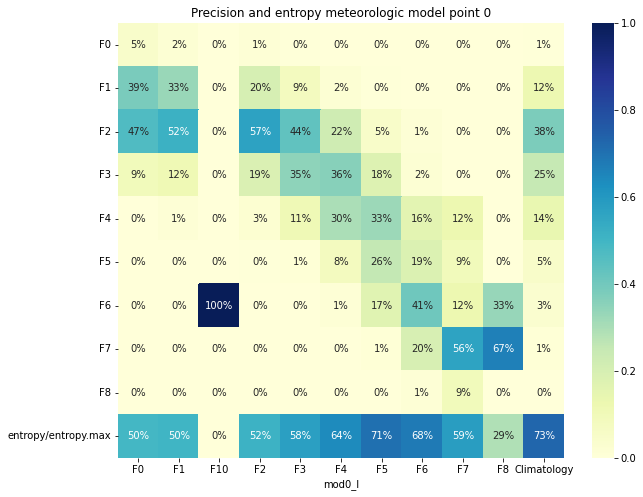

In [13]:
import math
from scipy.stats import entropy


plt.figure(figsize=(10, 8))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**meteorological model score point 9**

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


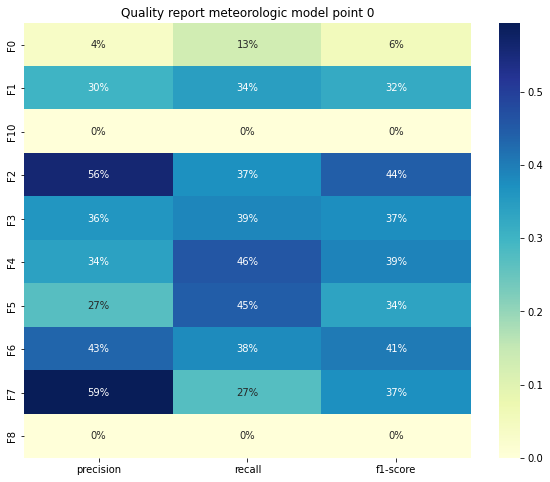

In [28]:
plt.figure(figsize=(10, 8))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all.spd_udr_l, df_all.mod9_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

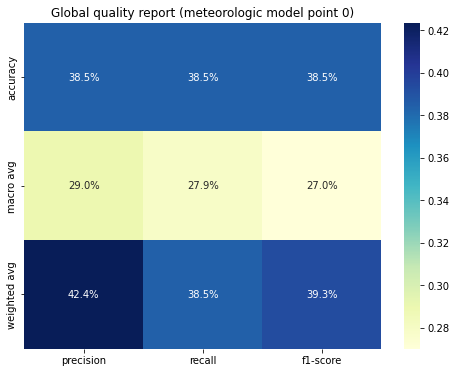

In [29]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

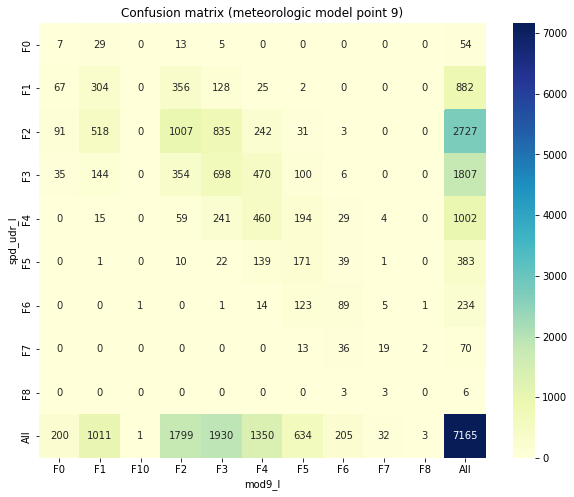

In [31]:
plt.figure(figsize=(10, 8))
plt.title("Confusion matrix (meteorologic model point 9)")

global_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod9_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

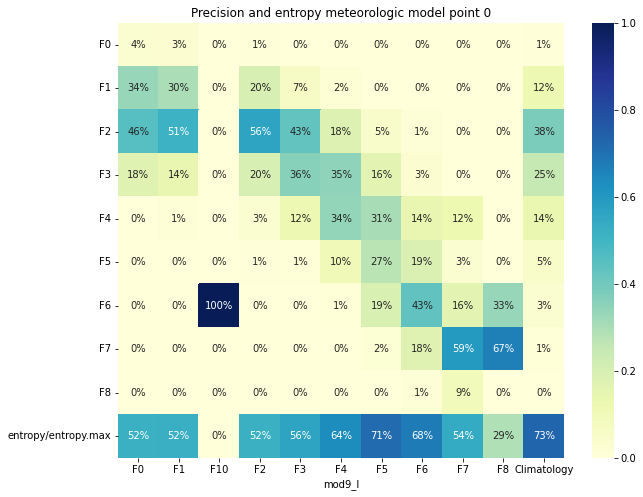

In [32]:
import math
from scipy.stats import entropy


plt.figure(figsize=(10, 8))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all.spd_udr_l, df_all.mod9_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Machine learning**

In [ ]:
!pip install lazypredict

In [48]:
#X variables
df_all.iloc[:,1:-3].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cape9', 'cin9', 'cfh9', 'cfl9', 'cfm9', 'cft9', 'HGT5009', 'HGT8509',
       'T5009', 'T8509'],
      dtype='object', length=250)

In [44]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all.spd_udr_l
X = df_all.iloc[:,2:-3]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [05:13<00:00, 10.80s/it]


In [45]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.61,0.48,None,0.60,2.59
BaggingClassifier,0.54,0.43,None,0.53,10.65
RandomForestClassifier,0.59,0.43,None,0.57,7.06
ExtraTreeClassifier,0.47,0.39,None,0.47,0.13
DecisionTreeClassifier,0.45,0.38,None,0.46,1.72
XGBClassifier,0.54,0.38,None,0.51,62.36
LGBMClassifier,0.54,0.37,None,0.53,53.52
LabelPropagation,0.48,0.35,None,0.52,1.92
LabelSpreading,0.48,0.35,None,0.52,3.16


In [50]:
#X columns only point 0
df_all.iloc[:,1:20].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0'],
      dtype='object')

**Machine learning LGBMClassifier**

In [65]:
import numpy as np
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# X and Y
Y = df_all.spd_udr_l
X = df_all.iloc[:,1:20]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  
  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("Accuracy mean of samples: ",acc_ml)



Confusion matrix  (Machine Learning)

col_0      F0  F1   F2   F3   F4  F5  F6  F7  F8   All
spd_udr_l                                             
F0          2   4    3    1    0   0   0   0   0    10
F1          0  39   89    4    1   0   0   0   0   133
F2          0  26  285   63    7   0   0   0   0   381
F3          0   4   85  160   46   0   1   0   0   296
F4          0   1   15   40   85  10   1   0   0   152
F5          0   0    1    5   22  23   7   0   0    58
F6          0   0    0    0    4   8  19   4   0    35
F7          0   0    0    0    1   0   4   3   2    10
All         2  74  478  273  166  41  32   7   2  1075

Quality report (Machine Learning)

              precision  recall  f1-score  support
F0                 1.00    0.20      0.33    10.00
F1                 0.53    0.29      0.38   133.00
F2                 0.60    0.75      0.66   381.00
F3                 0.59    0.54      0.56   296.00
F4                 0.51    0.56      0.53   152.00
F5            

**T test (1sample) compare machine learning mean accuracy in a sample (n=10) versus meteorological model mean accuracy at point 0 (38%). The alternative hypothesis is: the mean of the underlying distribution of the sample is greater than the given population mean (popmean). Significance level (alpha) = 0.01**

In [55]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(acc_ml, popmean=0.38, alternative="greater")

print("\nalpha: ",alpha)

print("\naccuracy list from machine learning test:",acc_ml)
print("\n**** Point 0 ****")
print("\np_value point 0:",p_value0)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")


alpha:  0.01

accuracy list from machine learning test: [0.57, 0.6, 0.6, 0.59, 0.59, 0.55, 0.59, 0.53, 0.6, 0.51]

**** Point 0 ****

p_value point 0: 7.560563140618848e-09

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0


**Machine learning extratreesclassifier**

In [54]:
# X and Y
Y = df_all.spd_udr_l
X = df_all.iloc[:,1:20]

# mean accuracy machine learning sample array
acc_ml_p = []

#seed random function
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_p.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  
  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("Accuracy mean of samples: ",acc_ml_p)


Confusion matrix  (Machine Learning)

col_0      F0  F1   F2   F3   F4  F5  F6  F7  F8   All
spd_udr_l                                             
F0          2   4    3    0    1   0   0   0   0    10
F1          1  42   86    3    0   1   0   0   0   133
F2          3  24  301   45    8   0   0   0   0   381
F3          0   5   90  157   41   2   1   0   0   296
F4          0   0   12   42   86  11   1   0   0   152
F5          0   0    3    0   27  22   6   0   0    58
F6          0   0    0    0    2   7  20   6   0    35
F7          0   0    0    0    0   1   3   5   1    10
All         6  75  495  247  165  44  31  11   1  1075

Quality report (Machine Learning)

              precision  recall  f1-score  support
F0                 0.33    0.20      0.25    10.00
F1                 0.56    0.32      0.40   133.00
F2                 0.61    0.79      0.69   381.00
F3                 0.64    0.53      0.58   296.00
F4                 0.52    0.57      0.54   152.00
F5            

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample with LGBMClassifier is less than the mean of the distribution underlying the sample with ExtratreesClassifier. Significance level (alpha) = 0.01**

In [57]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_p, alternative="less")

print("\nmeans with LGBMClassifier:", acc_ml)
print("\nmeans with extratreesclassifier:", acc_ml_p)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning with extratreesclassifier model = accuracy mean machine learning with LGBMClassifier model")
    print("\nwe are accepting alternative hypothesis: the mean of the sample with LGBMClassifier model is less than the mean of the sample with extratreesclassifier model")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy mean machine learning with extratreesclassifier model = accuracy mean machine learning with LGBMClassifier model")


means with LGBMClassifier: [0.57, 0.6, 0.6, 0.59, 0.59, 0.55, 0.59, 0.53, 0.6, 0.51]

means with extratreesclassifier: [0.59, 0.61, 0.6, 0.59, 0.6, 0.59, 0.63, 0.62, 0.58, 0.58]

alpha:  0.01

p_value point:  0.019494949214963815

we are accepting null hypothesis:  H0: accuracy mean machine learning with extratreesclassifier model = accuracy mean machine learning with LGBMClassifier model


**Save model**

In [63]:
X.columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0'],
      dtype='object')

In [66]:
import pickle
from sklearn.pipeline import Pipeline

x_var = X.columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("spd_udr_1km_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
